# **Milestones 2**
### **HACTIV8 Full Time Data Science Phase 2**

# **1. Perkenalan**

## **1.1 Identitas**

> Nama  : Ropiudin

> Batch : FTDS OO2-HCK

> Milestones : Milestones 2

## **1.2 Dataset**

> Pada Milestones ini dataset yang digunakan adalah Brian Tumor Dataset dari wabset kaggel dengan link sebagai berikut [link](https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset). Dataset ini merupakan kumpulan gambar hasil rontgen otak pasien yang didiagnosis tumor otak

## **1.3 Latar Belakang Masalah**

> Tumor otak adalah penyakit yang timbul akibat tumbuhnya jaringan abnormal di otak. Tergantung pada jenisnya, tumor otak bisa bersifat jinak atau ganas. Munculnya tumor di otak bisa berasal dari jaringan otak itu sendiri (atau disebut tumor otak primer), bisa juga berasal dari kanker pada organ lain yang menyebar ke otak (tumor otak sekunder).

> Tumor otak sangat berbahaya jika dibiarkan karena akan menyebabkan semakin parahnya kondisi pasien yang menderitanya bahkan menyebabkan kematian, oleh sebab itu perlu dilakukan pendiagnosisan dari awal, supaya mendapatkan penanganan - penanganan sejak dini.

> Berdasarkan penjelasan di atas, saya tertarik untuk menganalisis pendiagnosisan pasien yang mengidap tumor otak, dengan menggunakan Computer Vision yaitu Convolutional Neural Network

> Convolutional Neural Network (CNN) adalah salah satu jenis neural network yang biasa digunakan pada data image. CNN bisa digunakan untuk mendeteksi dan mengenali object pada sebuah image

## **1.4 Problem Statement**

> Problem statement yang akan saya tentukan pada analisis ini adalah
> 1. Ada berapa banyak data image pada dataset?
> 2. Terdapat berapa kelas pada dataset?
> 3. Apakah image pada dataset memiliki ukuran pixel yang sama

## **1.5 Objective**

> Pada Milestones ini akan dilakukan pembuatan model Deep Learning yaitu Convolutional Neural Network (CNN) untuk mengklasifikasi tumor otak

# **2. Import Libraries** 

In [78]:
import splitfolders
import pathlib 
import os
import cv2

import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve,roc_auc_score, confusion_matrix, f1_score

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

> Cell diatas merupakan library yang digunakan pada milestone ini

# **3. Data Loading** 

In [2]:
splitfolders.ratio('Brain Tumor Data Set', output='Dataset Brain Tumor', seed=42, ratio=(0.8,0.1,0.1), group_prefix=None)

Copying files: 4597 files [00:05, 841.18 files/s] 


> Cell diatas merupakan splitting pada dataset yang digunakan menjadi dataset training, dataset validasi dan dataset testing dengan persentase masing - masing 80%, 10% dan 10% dari total keseluruhan data, yang mana total keseluruhan dataset terdiri dari 4597.

In [3]:
train_folder=r'Dataset Brain Tumor/train/'
val_folder=r'Dataset Brain Tumor/val/'
test_folder=r'Dataset Brain Tumor/test/'

> Code diatas merupakan loading data yang digunakan

In [4]:
data_train = pathlib.Path(train_folder)
train_count = len(list(data_train.glob('*/*.jpg')))

data_val = pathlib.Path(val_folder)
val_count = len(list(data_val.glob('*/*.jpg')))

data_test = pathlib.Path(test_folder)
test_count = len(list(data_test.glob('*/*.jpg')))

print('==========data_train==========')
print(train_count)
print('==========data_val==========')
print(val_count)
print('==========data_test==========')
print(test_count)

==========data_train==========
3608
==========data_val==========
447
==========data_test==========
448


> Dari hasil diatas dapat diketahui bahwa, jumlah masing - masing gambar disetiap dataset yaitu pada dataset training terdapat sebanyak 3608 gambar, pada dataset validasi terdapat sebanyak 447 gambar dan pada dataset testing terdapat sebanyak 448 gambar yang berformatkan .jpg

> Akan tetapi setelah tela'ah, dataset tidak hanya berformat .jpg, ada format lainnya, sehingga format lainnya tidak terbaca pada load data ini

# **4. Exploratory Data Analysis (EDA)** 

In [5]:
tumor_train= r'Dataset Brain Tumor/train/Brain Tumor/'
healthy_train= r'Dataset Brain Tumor/train/Healthy/'
dirlist=[tumor_train, healthy_train]
classes=['Brain Tumor', 'Healthy']
filepaths=[]
labels=[]
for d,c in zip(dirlist, classes):
    flist=os.listdir(d)
    for f in flist:
        fpath=os.path.join (d,f)
        filepaths.append(fpath)
        labels.append(c)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  3677    labels:  3677


> Dari hasil diatas diketahui bahwa, pada dataset training memiliki total keseluruhan gambar adalah 3677 gambar dari semua format gambar.

Brain Tumor    2008
Healthy        1669
Name: labels, dtype: int64


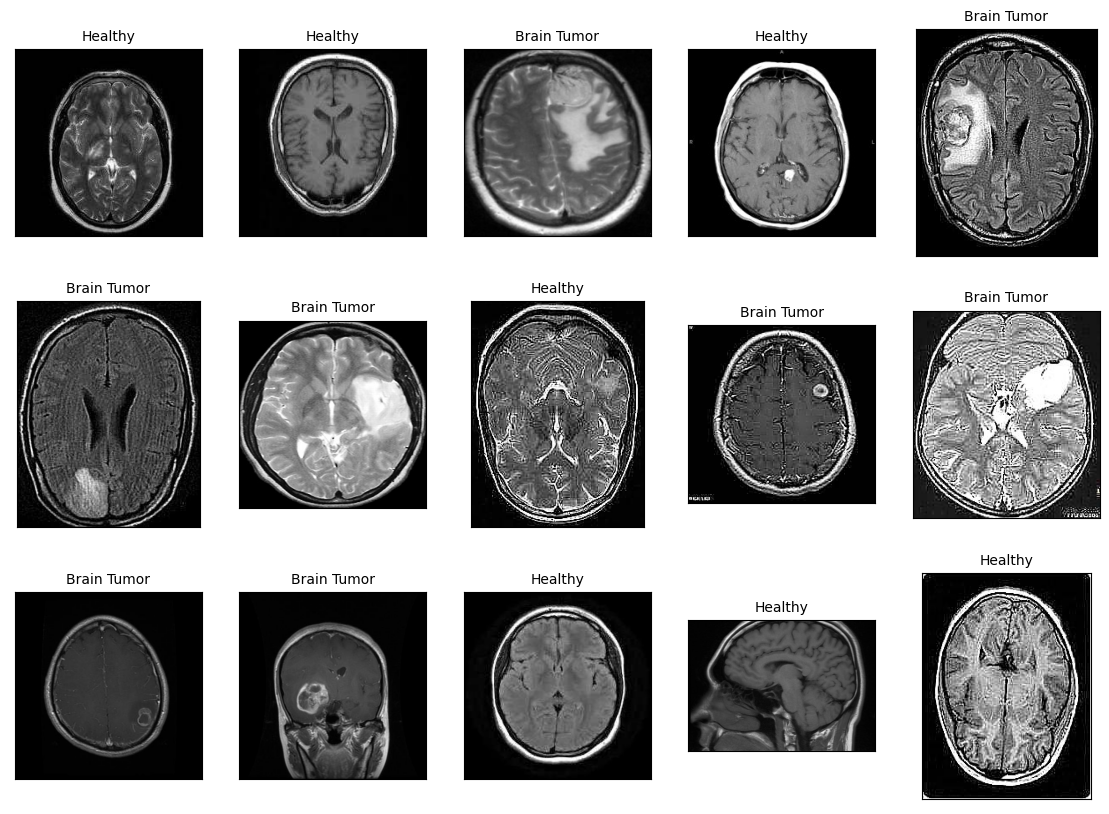

In [6]:
Fseries=pd.Series(filepaths, name='file_paths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries,Lseries], axis=1)
df=pd.DataFrame(np.array(df).reshape(3677,2), columns = ['file_paths', 'labels'])
print(df['labels'].value_counts())

plt.figure(figsize=(14,10))
for i in range(15):
    random = np.random.randint(1,len(df))
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.imread(df.loc[random,"file_paths"]))
    plt.title(df.loc[random, "labels"], size = 10, color = "black") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

> Berdasarkan hasil diatas, diperoleh informasi bahwa pada dataset terdapat dua kelas yaitu Brain Tumor dan Healthy. Dan berdasarkan output diatas juga diketahui bahwa ukuran gambar pada dataset tidak sama atau tidak seragam, hal ini perlu di antisipasi supaya memperlancar pada proses selanjutnya

> Berdasarkan hasil output diatas, gambar yang pada dataset berisikan hasil rontgen otak yang bervariasi. Ada yang nampak dari atas, ada yang nampak dari samping dan ada yang nampak dari belakang. Dan dari hasil gambar juga, diperoleh informasi bahwa pasien yang mengidap tumor otak memiliki hasil rontgen otak yang terdapat putih - putih ata semacam benjolan pada otaknya. Oleh karna itu dibutuhkan suatu model yang dapat mengidentifikasikan hal tersebut dengan baik

# **5. Data Preprocessing**

In [7]:
IMG_WIDTH=250
IMG_HEIGHT=250
batch_size=32

> Code diatas merupakan penentuaan ukuran dari gambar, dikarnakan gambar pada dataset tidak memiliki ukuran yang seragam. makan sebelum masuk pemodel gambar terlebih dahulu diseragamkan ukurannya. Disini saya menggunakan ukuran gambar 250x250 dikarnakan ukuran tersebut sering digunakan

In [8]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_folder,
                                                            shuffle=True,
                                                            batch_size=batch_size,
                                                            image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            label_mode='categorical')

Found 3615 files belonging to 2 classes.


In [9]:
val_dataset = tf.keras.utils.image_dataset_from_directory(val_folder,
                                                            shuffle=True,
                                                            batch_size=batch_size,
                                                            image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            label_mode='categorical')

Found 448 files belonging to 2 classes.


In [10]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_folder,
                                                            shuffle=True,
                                                            batch_size=batch_size,
                                                            image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            label_mode='categorical')

Found 448 files belonging to 2 classes.


> Tahapan diatas merupakan pendefinisikan objek train_folder, val_folder dan test_ folder kedalam train_dataset, val_dataset dan test_dataset dengan parameter - parameter yang tertera pada code salah satunya merubah ukuran gambar menjadi 250X250. Hal ini dilakaukan supaya dataset dapat digunakan pada tahapan pemodelan

> Dari hasil diatas juga diperoleh informasi jumlah dataset disetiap dataset yang digunakan, dan jumlah kelasnya

In [11]:
class_names = train_dataset.class_names
print(class_names)

['Brain Tumor', 'Healthy']


> Terdapat dua kelas pada dataset yaitu Brain Tumor dan Healthy

In [12]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 250, 250, 3)
(32, 2)


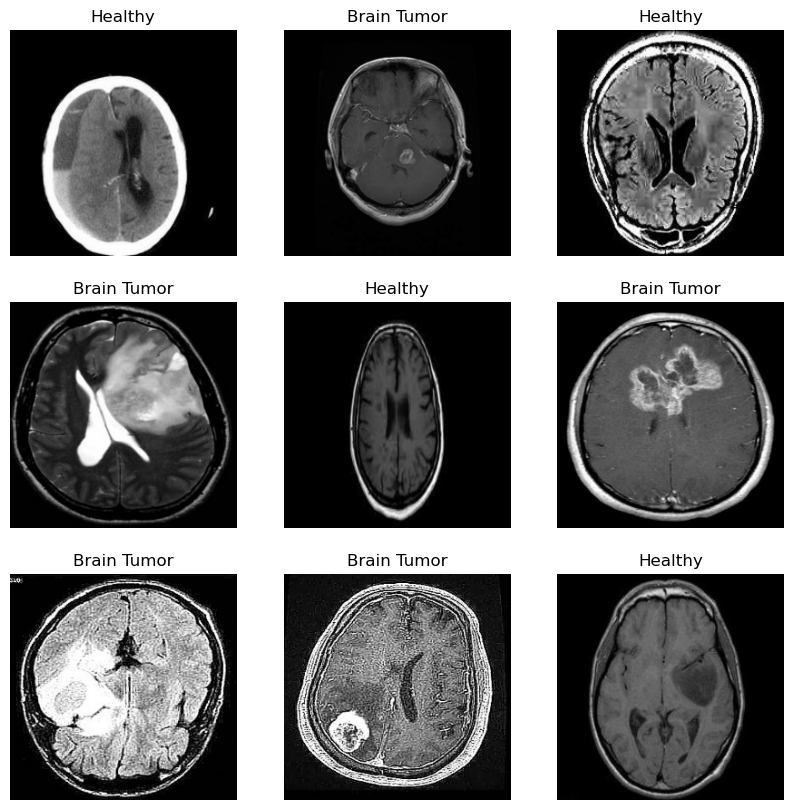

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[list(labels[i]).index(1)])
    plt.axis("off")

> Output diatas merupakan hasil dari pendefinisian disetiap dataset, salah satunya pada train dataset, berdasarkan hasil diatas gambar sudah memiliki ukuran yang sama, sehingga sudah siap masuk ke pemodelan

In [14]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

> Sebelum memasuki pemodel dataset harus direscaling terlebih dahulu, seperti halnya pada proses pemodelan dengan machine learning. kita sudah mengetahui bahwa nilai pixel pada gambar adalah antara 1-256 (atau 0-255 dalam python). Dengan konversi menggunakan perintah rescale, datanya menjadi 0-1.

In [15]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.experimental.preprocessing.RandomFlip("vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1)
  ]
)

> Code diatas merupakan data augmentasi pada gambar, data augmentation diartikan sebagai memperbanyak data. Untuk mendapatkan pembelajaran yang baik tentunya harus menggunakan data yang banyak sehingga pada milestone ini dilakukan data augmentasi supaya mendapatkan hasil training yang baik. parameter yang digunakan pada data augmentasi adalah RandomFlip horizontal dan vertikal yang berarti memutar gambar secara horizontal dan vertikal. Dengan demikian, gambar baru hasil augmentation akan berbeda dengan gambar asal karena dibalik (diputar) secara horisontal dan vertikal

> Sedangkan parameter augmentasi RandomRotation(0.1) adalah parameter untuk merotasi gambar sebesar 10%, sehingga gambar baru hasil augmentation akan berbeda dengan gambar asal karena dirotasi sebesar 10%

> Parameter pada data augmentasi dilakukan supaya mendapatkan data baru yang tidak terlalu signifikan perubahannya, yang berakibatkan kesalah informasi dari gambar, seperti melakukan Randomflip yang tidak merubah data asli secara signifikan 

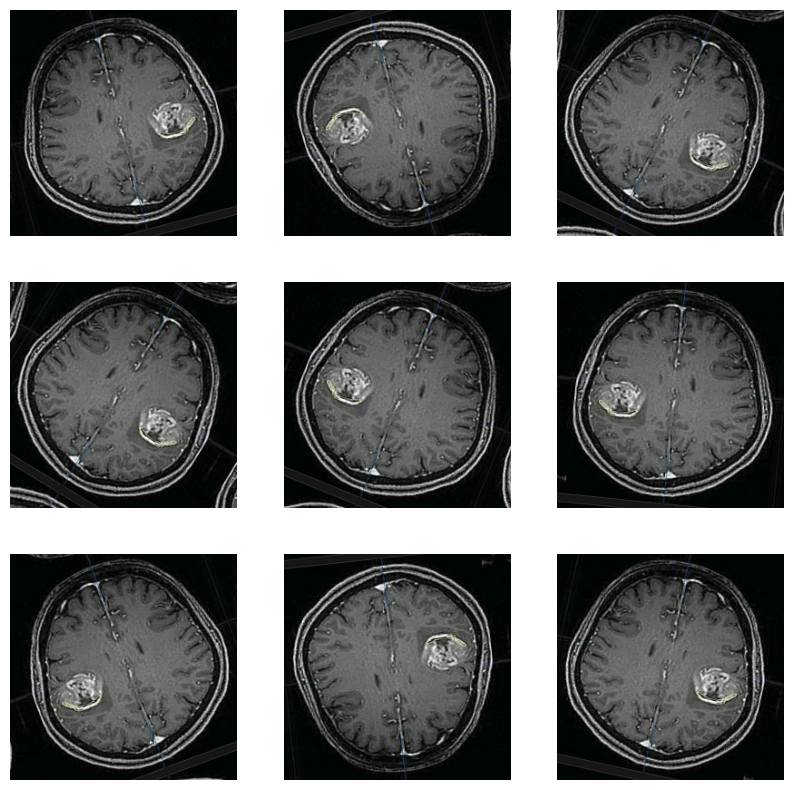

In [16]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

> Output diatas merupakan data baru hasil augmentasi dan berdasarkan hasil diatas menjukkan data aougmentasi berhasil

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().shuffle(3000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

> Code diatas merupakan Konfigurasikan dataset untuk performa. Hal ini wajib dilakukan pada tahapan model CNN

# **6. Modeling** 

## **6.1. Model Definition**

> Pada tahap model definition, model yang digunakan adalah sebagai berikut:

1. Model CNN Sequential API
2. Model Improvement CNN Squential API

> Dari model - model ini akan dilihat performa berdasarkan acurracy disetiap model sehingga diperoleh satu model yang nantinya akan digunakan pada tahap selanjutnya

**Model CNN Sequential API**

In [18]:
model_seq_1 = Sequential([
  normalization_layer,
  data_augmentation,
  layers.InputLayer(input_shape=(250,250,3)),
  layers.Conv2D(32, 3, activation="relu", padding="same"),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation="relu", padding="same"),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Dense(16, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Dense(2, activation='softmax')
])

In [19]:
model_seq_1.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model_seq_1.build(input_shape=(None, 250, 250, 3))
model_seq_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 250, 250, 3)       0         
                                                                 
 sequential (Sequential)     (None, 250, 250, 3)       0         
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                      

**Model Improvement CNN Squential API** 

In [21]:
model_seq_2 = Sequential([
    normalization_layer,
    data_augmentation,
    layers.InputLayer(input_shape=(250, 250, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu',),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [22]:
model_seq_2.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model_seq_2.build(input_shape=(None, 250, 250, 3))
model_seq_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 250, 250, 3)       0         
                                                                 
 sequential (Sequential)     (None, 250, 250, 3)       0         
                                                                 
 input_2 (InputLayer)        multiple                  0         
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 125, 125, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                      

In [24]:
model_seq_3 = Sequential([
    normalization_layer,
    layers.InputLayer(input_shape=(250, 250, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),   
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [25]:
model_seq_3.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model_seq_3.build(input_shape=(None, 250, 250, 3))
model_seq_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 250, 250, 3)       0         
                                                                 
 input_3 (InputLayer)        multiple                  0         
                                                                 
 conv2d_5 (Conv2D)           (None, 250, 250, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 125, 125, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                  

## **6.2. Model Training**

In [27]:
history_1 = model_seq_1.fit(train_ds,validation_data=val_ds,epochs=25)

Epoch 1/25
113/113 [==============================] - 301s 3s/step - loss: 1.4769 - accuracy: 0.6174 - val_loss: 1.0952 - val_accuracy: 0.5759
Epoch 2/25
113/113 [==============================] - 294s 3s/step - loss: 1.0173 - accuracy: 0.5964 - val_loss: 0.7801 - val_accuracy: 0.7857
Epoch 3/25
113/113 [==============================] - 278s 2s/step - loss: 0.8534 - accuracy: 0.6127 - val_loss: 0.8691 - val_accuracy: 0.5357
Epoch 4/25
113/113 [==============================] - 280s 2s/step - loss: 0.8241 - accuracy: 0.5472 - val_loss: 1.0388 - val_accuracy: 0.5357
Epoch 5/25
113/113 [==============================] - 296s 3s/step - loss: 0.7670 - accuracy: 0.6166 - val_loss: 0.8018 - val_accuracy: 0.5603
Epoch 6/25
113/113 [==============================] - 278s 2s/step - loss: 0.7302 - accuracy: 0.6324 - val_loss: 0.8221 - val_accuracy: 0.4665
Epoch 7/25
113/113 [==============================] - 280s 2s/step - loss: 0.7198 - accuracy: 0.6373 - val_loss: 0.7096 - val_accuracy: 0.6629

In [28]:
history_2 = model_seq_2.fit(train_ds,validation_data=val_ds,epochs=25)

Epoch 1/25
113/113 [==============================] - 208s 2s/step - loss: 0.5563 - accuracy: 0.7173 - val_loss: 0.8425 - val_accuracy: 0.6808
Epoch 2/25
113/113 [==============================] - 201s 2s/step - loss: 0.4244 - accuracy: 0.8127 - val_loss: 0.5961 - val_accuracy: 0.7254
Epoch 3/25
113/113 [==============================] - 206s 2s/step - loss: 0.3277 - accuracy: 0.8614 - val_loss: 0.7585 - val_accuracy: 0.7746
Epoch 4/25
113/113 [==============================] - 201s 2s/step - loss: 0.2782 - accuracy: 0.8830 - val_loss: 0.5691 - val_accuracy: 0.7991
Epoch 5/25
113/113 [==============================] - 188s 2s/step - loss: 0.2283 - accuracy: 0.9076 - val_loss: 0.6924 - val_accuracy: 0.7946
Epoch 6/25
113/113 [==============================] - 188s 2s/step - loss: 0.2344 - accuracy: 0.9057 - val_loss: 0.5560 - val_accuracy: 0.7969
Epoch 7/25
113/113 [==============================] - 187s 2s/step - loss: 0.1654 - accuracy: 0.9325 - val_loss: 0.8409 - val_accuracy: 0.8080

In [29]:
history_3 = model_seq_3.fit(train_ds,validation_data=val_ds,epochs=25)

Epoch 1/25
113/113 [==============================] - 166s 1s/step - loss: 0.5818 - accuracy: 0.6758 - val_loss: 0.4933 - val_accuracy: 0.7991
Epoch 2/25
113/113 [==============================] - 168s 1s/step - loss: 0.4298 - accuracy: 0.8160 - val_loss: 0.4088 - val_accuracy: 0.8549
Epoch 3/25
113/113 [==============================] - 168s 1s/step - loss: 0.3529 - accuracy: 0.8609 - val_loss: 0.3511 - val_accuracy: 0.8661
Epoch 4/25
113/113 [==============================] - 166s 1s/step - loss: 0.3008 - accuracy: 0.8871 - val_loss: 0.3373 - val_accuracy: 0.8616
Epoch 5/25
113/113 [==============================] - 166s 1s/step - loss: 0.2609 - accuracy: 0.9120 - val_loss: 0.3023 - val_accuracy: 0.8996
Epoch 6/25
113/113 [==============================] - 171s 2s/step - loss: 0.2307 - accuracy: 0.9270 - val_loss: 0.2769 - val_accuracy: 0.9018
Epoch 7/25
113/113 [==============================] - 164s 1s/step - loss: 0.2082 - accuracy: 0.9322 - val_loss: 0.2753 - val_accuracy: 0.8906

> Proses diatas merupakn tahapan traning pada setiap model yang ditentukan, dangan masing - masing model menggunakan epoch sebanyak 25 kali

## **6.3. Model Evaluation**

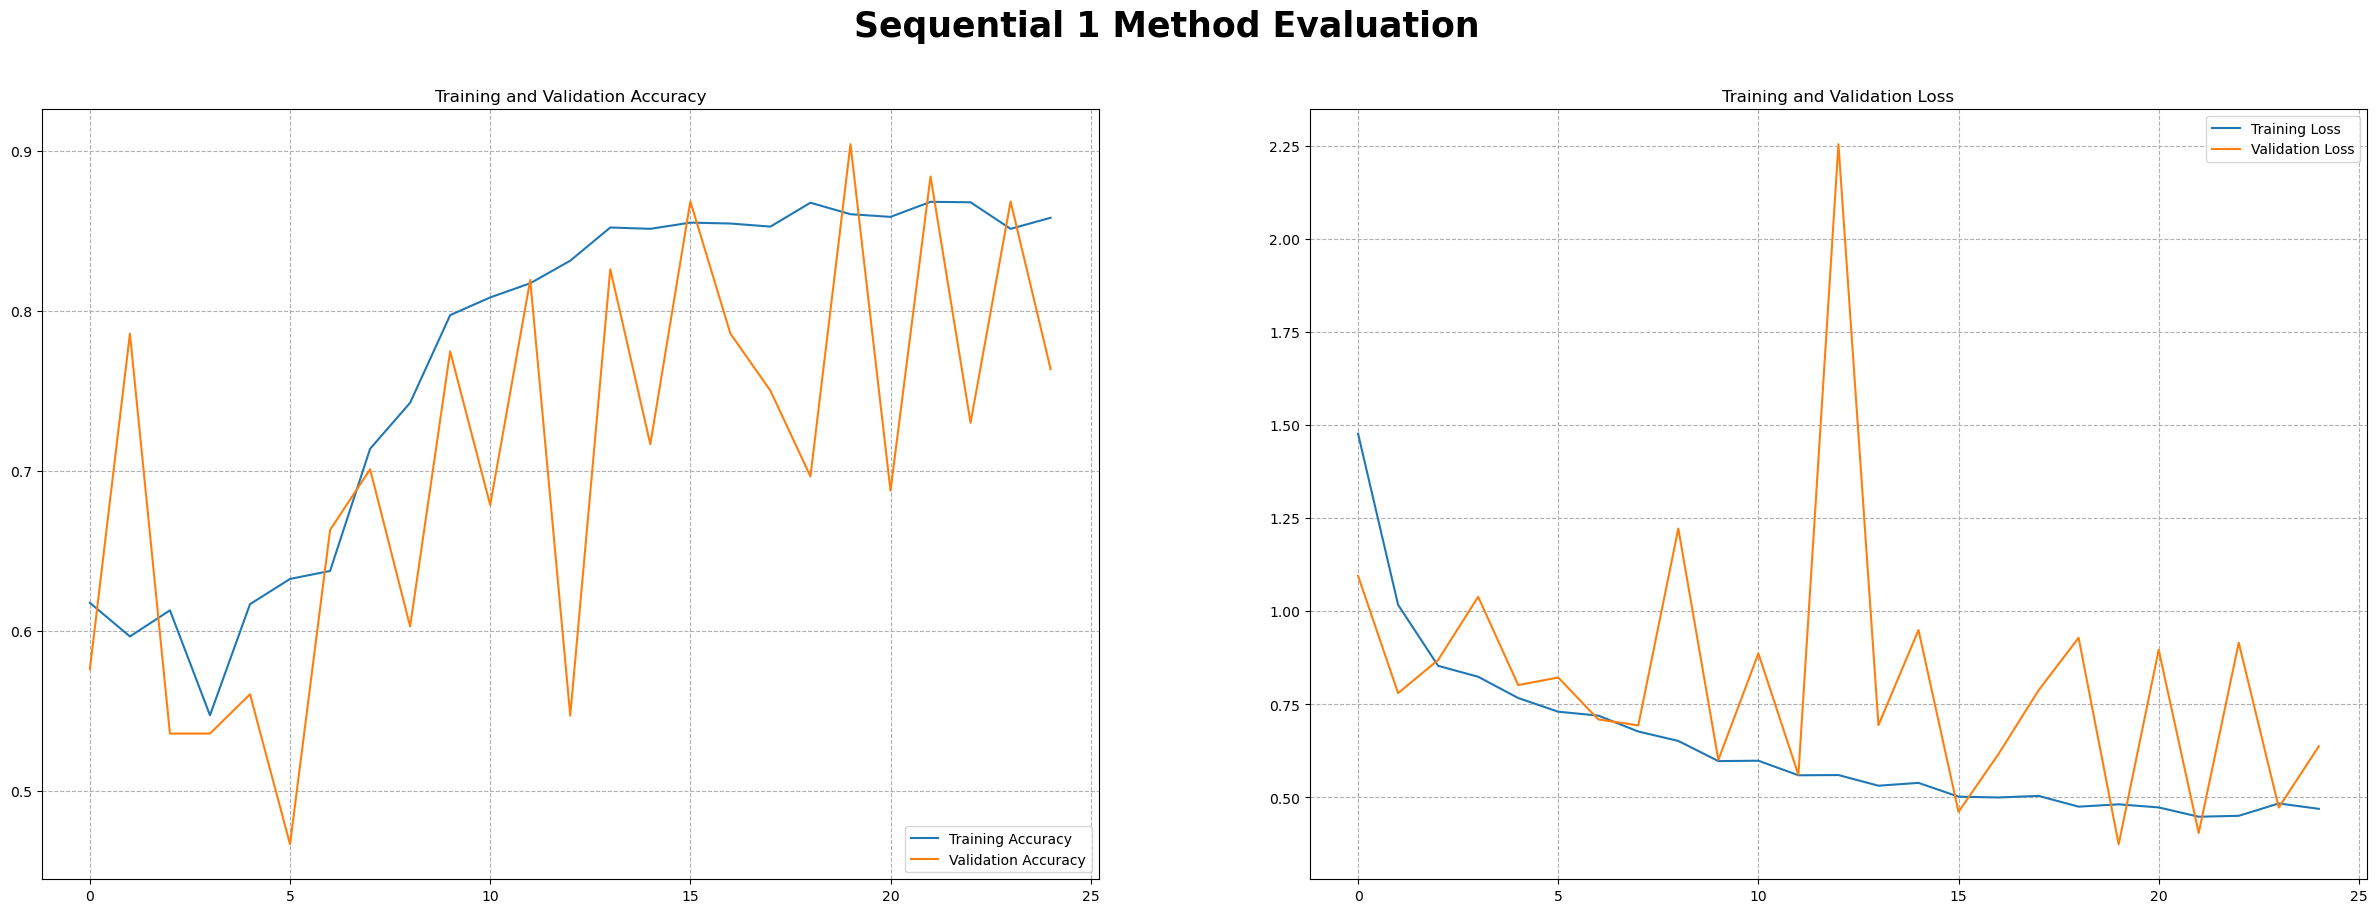

In [30]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(25)

fig, ax = plt.subplots(1,2, figsize=(30,10))

plt.suptitle('Sequential 1 Method Evaluation', fontsize=25, weight='bold')
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(linestyle='--')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(linestyle='--')
plt.show()

In [31]:
print("\nEvaluate on test data")
result = model_seq_1.evaluate(test_ds)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
14/14 [==============================] - 18s 1s/step - loss: 0.6705 - accuracy: 0.7433
Test - Loss     :  0.6705378293991089
Test - Accuracy :  0.7433035969734192



> Pada model squential 1, berdasarkan grafik accuracy dan loss, model memiliki masalah exploding gradient dengan ditandai oleh grafik pada dataset validasi yang tidak stabil atau terjadi perbahan yang bersar disetiap epochnya. Hal ini bisa kemungkinan terdapat parameter - parameter untuk handling exploding gradient dimasukkan kedalam model seperti kernel_regularizer. Sehingga pada model selanjutnya, akan dihapus parameter yang menghandling exploding gradient.

> Dan pada model Sequential 1 memiliki loss dan accuracy pada dataset testing masing - masing sebesar 0.67 dan 0.74

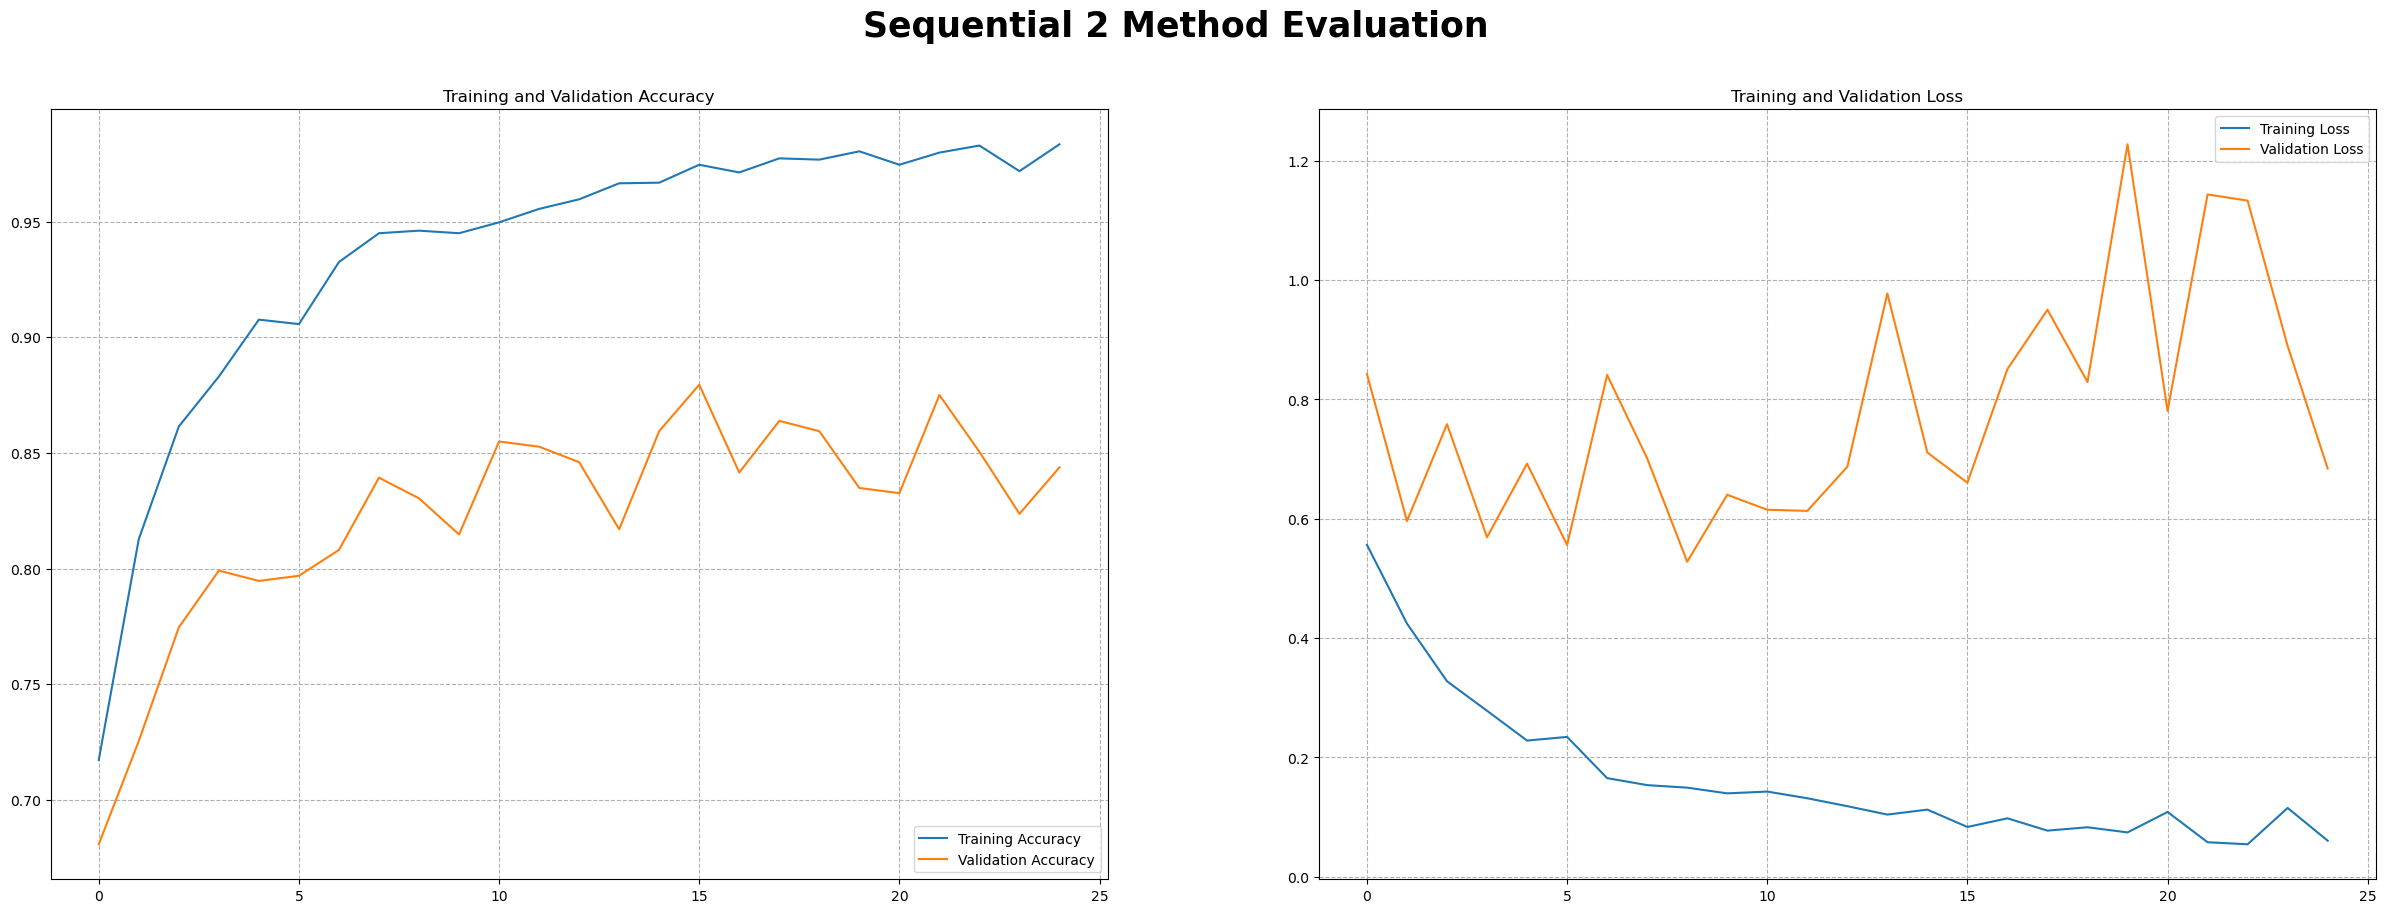

In [32]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(25)

fig, ax = plt.subplots(1,2, figsize=(30,10))

plt.suptitle('Sequential 2 Method Evaluation', fontsize=25, weight='bold')
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(linestyle='--')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(linestyle='--')
plt.show()

In [33]:
print("\nEvaluate on test data")
result = model_seq_2.evaluate(test_ds)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
14/14 [==============================] - 10s 735ms/step - loss: 0.7291 - accuracy: 0.8482
Test - Loss     :  0.7290555238723755
Test - Accuracy :  0.8482142686843872



> Pada model squential 2 dengan dilakukan perubahan pada parameter - parameter yang digunakan pada model, berdasarkan grafik accuracy dan loss, model tidak memiliki masalah exploding gradient yang tidak terlalu besar perubahannya, akan tetapi model memiliki masalah overfiting. Sehingga untuk model selanjutnya akan dicoba mengganti optimizir supaya mendapatkan model yang tidak overfiting

> Dan pada model Sequential 2 memiliki loss dan accuracy pada dataset testing masing - masing sebesar 0.72 dan 0.84

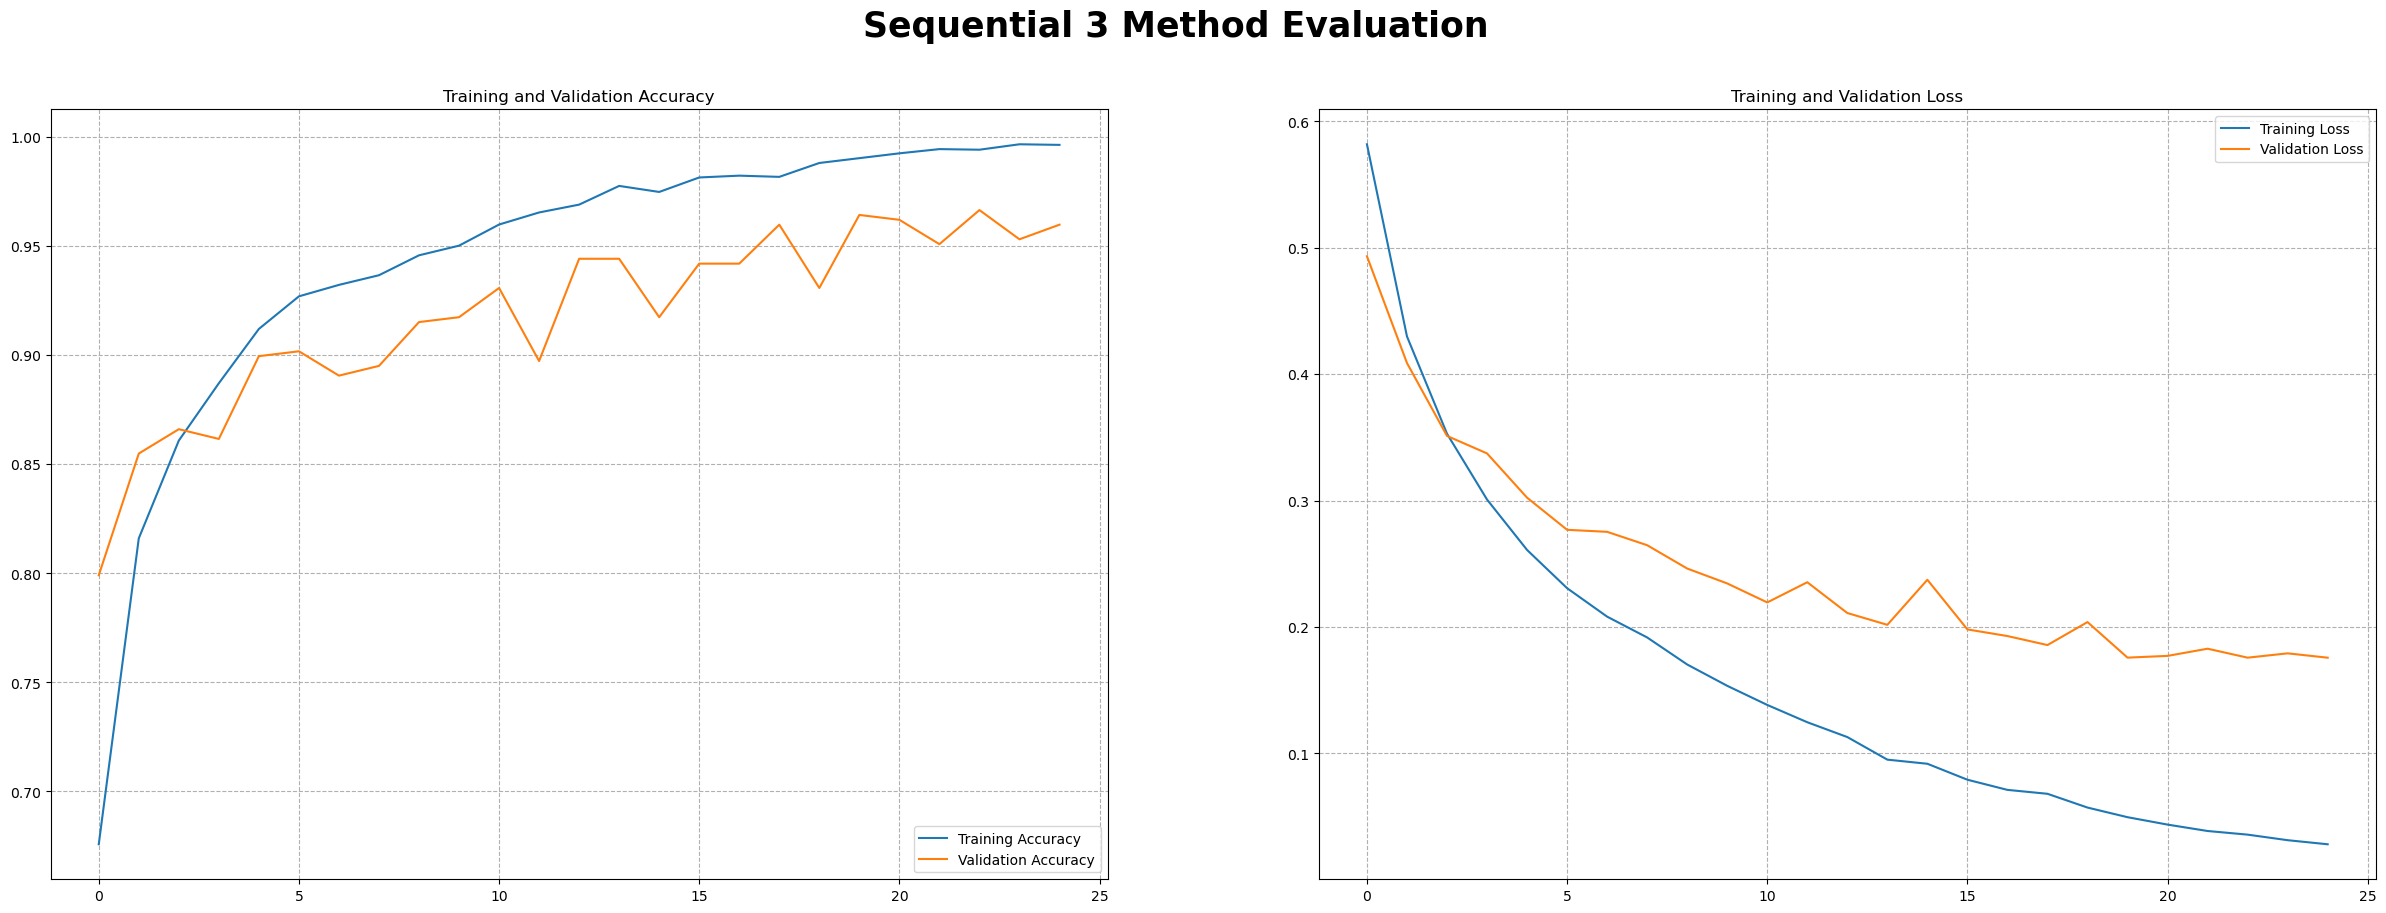

In [34]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(25)

fig, ax = plt.subplots(1,2, figsize=(30,10))

plt.suptitle('Sequential 3 Method Evaluation', fontsize=25, weight='bold')
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(linestyle='--')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(linestyle='--')
plt.show()

In [56]:
print("\nEvaluate on test data")
result = model_seq_3.evaluate(test_ds)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
14/14 [==============================] - 5s 334ms/step - loss: 0.0780 - accuracy: 0.9688
Test - Loss     :  0.07802704721689224
Test - Accuracy :  0.96875



> Pada model squential 3 dengan dilakukan perubahan pada parameter - parameter yang digunakan pada model, berdasarkan grafik accuracy dan loss, model bisa dikatakan cukup baik dikarnakan sudah tidak terdapat exploding garient dan model goodfit

> Dan pada model Sequential 3 memiliki loss dan accuracy pada dataset testing yang lebih baik daripada model yang lainnya yaitu masing - masing sebesar 0.07 dan 0.96

> Berdasarkan hasil model evaluasi diatas, model squential 3 ditetapkan sebagai model terbaik yang akan digunakan ke tahpan selanjutnya dibandingkan dengan model lainnya, dikarnakan pada model squential 3 baik berdasarkan grafik dan hasil loss, accuracy pada dataset testing, lebih baik dari pada yang lainnya

In [75]:
pred = model_seq_3.predict(test_ds)
pred = np.argmax(pred, axis=1)
true = tf.concat([y for x, y in test_ds], axis = 0).numpy()
true = np.argmax(true,axis=1)
target_names = class_names


14/14 [==============================] - 5s 381ms/step


In [76]:
# classification report
pred = (pred > 0.9)
print('Classification Report')
print(classification_report(true, pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

 Brain Tumor       0.95      1.00      0.97       238
     Healthy       0.99      0.94      0.97       210

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



> Pada pemodelan ini akan difokuskan pada nilai recall di classification_report pada dataset, dikarnakan pada kasus data ini ingin difokuskan mengurangi kesalahan negatif yang mana label Brain Tumor didefinisikan sebagai kelas positif. Sehingga dengan menggunakan scoring recall, kita menghindari kesalahan prediksi pada label Brain Tumor, atau dengan kata lain mengurangi kesalahan negatif.

> Hal itu dikarnakan, tidak ingin terjadinya kesalahan prediksi yang seharusnya pasien mengidap tumor otak akan tetapi tidak salah diprediksi. Sehingga hal tersebut dapat membahayakan pasien

> Dengan menggunakan nilai theshold pada Classification Report > 90% memiliki nilai recall pada data testing yaitu sebesar 100% pada label Brain Tumor yang berarti dapat memprediksi dengan tepat terhadapat pada pasien yang mengidap tumor otak

> Dan berdasarkan Classification Report model memiliki nilai accuracy sebesar 97% yang berarti model sudah cukup baik dalam memprediksi


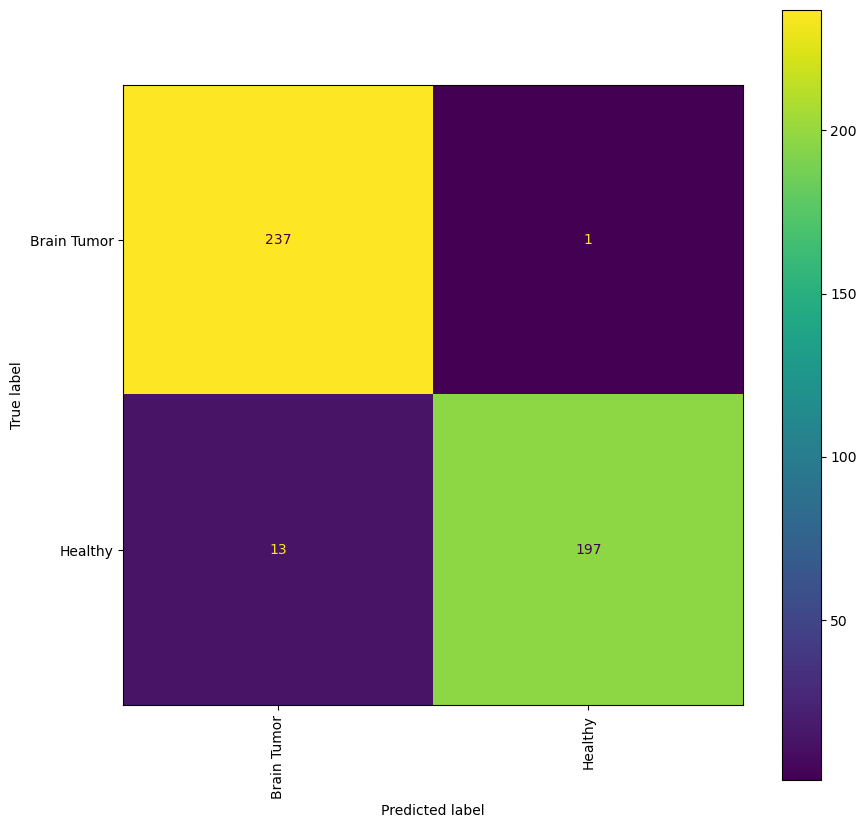

In [77]:
# confution Matrix
fig,ax = plt.subplots(figsize=[10,10])
ConfusionMatrixDisplay.from_predictions(true,pred, display_labels=class_names, xticks_rotation='vertical',ax=ax)
plt.show()

> Dan berdasarkan confusion_matrix model bisa memprediksi benar positif pada kelas Brain Tumor yaitu sebanyak 237 data dari 238 data sedangkan memprediksi salah negatif sebanyak 1 data dari 238 data. Sehingga dapat disimpulkan model sangat baik 

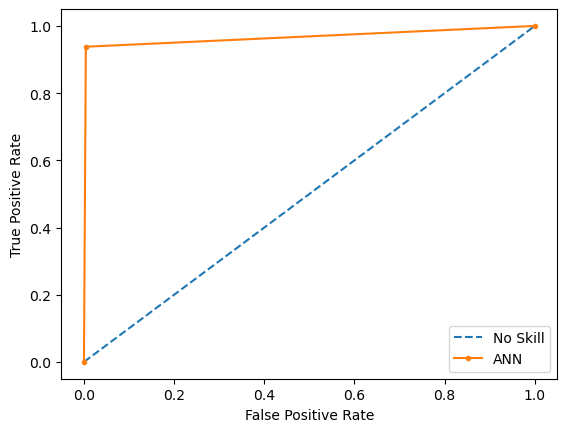

AUC score: 0.9669467787114846


In [79]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(true, pred.round())
auc = roc_auc_score(true, pred.round())

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {auc}')

> Berdasarkan hasil diatas, diketahui bahwa Skor AUC 0,966 berarti model dapat membedakan dua kelas sebesar 96.6% dan kurva akan terlihat seperti cenderung mendekati garis dengan kemiringan 1. Hal ini berarti model kemampuan dengan baik untuk memisahkan dua kelas

# **7. Model Saving**

In [61]:
model_seq_3.save('model_cnn.h5')

> Proses diatas merupakan saving Model terbaik yang akan digunakan kembali dalam melakukan model inference dan model deployment 

# **8. Model Inference**

In [47]:
# load model
model = tf.keras.models.load_model('model_cnn.h5')

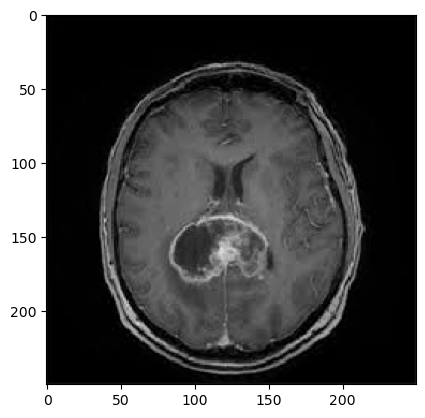

In [50]:
inf_image_1 = r'Dataset Inference/Cancer (2277).jpg'
img_1 = keras.preprocessing.image.load_img(
    inf_image_1, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

plt.imshow(img_1)
plt.show()


In [58]:
img_array = keras.preprocessing.image.img_to_array(img_1)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Prediction is {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 691ms/step
Prediction is Brain Tumor with a 72.00 percent confidence.


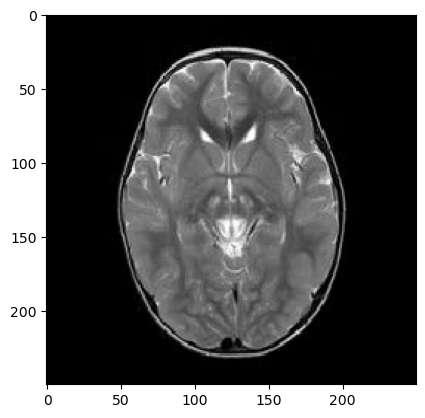

In [52]:
inf_image_2 = r'Dataset Inference/Not Cancer  (77).jpg'

img_2 = keras.preprocessing.image.load_img(
    inf_image_2, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

plt.imshow(img_2)
plt.show()

In [62]:
img_array = keras.preprocessing.image.img_to_array(img_2)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Prediction is {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 636ms/step
Prediction is Healthy with a 73.11 percent confidence.


> Pada tahapan model inference, model yang saya gunakan pada tahapan ini adalah model squential 3 dan ketika dimasukan data baru model dapat berjalan dan melakukan prediksi dengan tepat yang berarti model dapat digunakan dan dapat berjalan dalam melakukan prediksi terhadap data baru

# **9. Conclusions** 

Dari overall analysis dapat disimpulkan bahwa:

1. Dataset terdiri dari 4957 data yang berupa gambar, dan pada dataset terdapat dua kelas yaitu Brain Tumor dan Healthy

2. Dilakukan splitting pada dataset menjadi dataset training, dataset validasi dan dataset testing dengan masing - masing persentase 80%, 10% dan 10% dari keseluruhan data

3. Pada proses EDA, diketahui bahwa gambar pada dataset memiliki ukuran pixel yang berbeda - beda. Sehingga perlu pendefinisiian ulang supaya memiliki ukuran yang seragam

4. Pada data preprocessing dilakukan normalisasi data dengan menggunakan rescaling yaitu merubah data yang dari nilai pixel pada gambar adalah antara 1-256 (atau 0-255 dalam python). Dengan konversi menggunakan perintah rescale, datanya menjadi 0-1.

5. Selain normalisai data, pada data preprocessing dilakukan data augmentasi yaitu memperbanyak data. Untuk mendapatkan pembelajaran yang baik tentunya harus menggunakan data yang banyak sehingga dilakukan data augmentasi supaya mendapatkan hasil training yang baik. parameter yang digunakan pada data augmentasi adalah RandomFlip horizontal dan vertikal yang berarti memutar gambar secara horizontal dan vertikal. Dengan demikian, gambar baru hasil augmentation akan berbeda dengan gambar asal karena dibalik (diputar) secara horisontal dan vertikal. Sedangkan parameter augmentasi RandomRotation(0.1) adalah parameter untuk merotasi gambar sebesar 10%, sehingga gambar baru hasil augmentation akan berbeda dengan gambar asal karena dirotasi sebesar 10%.

6. Pada Model definition terdapat beberapa model yang digunakan yaitu model:
> - Model CNN Sequential API
> - Model Improvement CNN Squential API

7. Dari model - model ini akan dilihat performa berdasarkan acurracy disetiap model sehingga diperoleh satu model yang nantinya akan digunakan pada tahap selanjutnya

8. Berdasarkan hasil model evaluasi, model squential 3 ditetapkan sebagai model terbaik yang akan digunakan ke tahpan selanjutnya dibandingkan dengan model lainnya, dikarnakan pada model squential 3 baik berdasarkan grafik dan hasil loss, accuracy pada dataset testing, lebih baik dari pada yang lainnya

9. Dengan menggunakan nilai theshold pada Classification Report > 90% memiliki nilai recall pada data testing yaitu sebesar 100% pada label Brain Tumor yang berarti dapat memprediksi dengan tepat terhadapat pada pasien yang mengidap tumor otak. Dan berdasarkan Classification Report model memiliki nilai accuracy sebesar 97% yang berarti model sudah cukup baik dalam memprediksi

10. Dan berdasarkan confusion_matrix model bisa memprediksi benar positif pada kelas Brain Tumor yaitu sebanyak 237 data dari 238 data sedangkan memprediksi salah negatif sebanyak 1 data dari 238 data. Sehingga dapat disimpulkan model sangat baik 